dict_values(['Low', 'Normal', 'More', 'Drift'])
dict_values(['Dry', 'Mix', 'Wet'])
dict_values(['Low', 'Mix', 'High'])


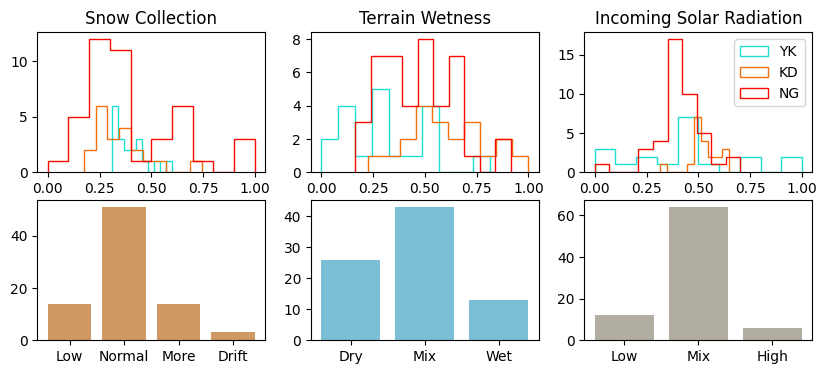

In [18]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('/home/hma000/storage/terrain_exp/ykl_terrain.csv', usecols=['name','twi','con','iso', 'clust'])

fig, axs = plt.subplots(
    nrows=2, ncols=3, sharex=False, figsize=(10, 4)
)
from terrain_clustering import normalize_data, sort_data
df = df.dropna()
df = normalize_data(df)

colours = ['#D09862','#7ABFD5', '#B1AEA1']
clust_colours = {'YK':'#1CE1CE', 'KD':'#F3700E','NG':'#F50B00'}
param_list = ['con', 'twi', 'iso']
titles = ['Snow Collection', 'Terrain Wetness', "Incoming Solar Radiation"]
for i in range(3):
    c = colours[i]
    param = param_list[i]
    plt.subplot(2, 3, i+1)
    for clust in df.clust.unique():
        plt.hist(df[df.clust ==clust][param], 
                 histtype='step', 
                 label = clust, 
                 color = c, 
                 ec=clust_colours[clust])
    plt.title(titles[i])
    if i == 2: plt.legend()


from collections import Counter


param_dict, df = sort_data(df)
for i in range(3):
    plt.subplot(2, 3, i+4)
    
    # i.e. groups = ["dry", "mix", "wet"]
    groups = param_dict[param_list[i]].values()
    print(groups)

    param = f'{param_list[i]}_str'
    # data = {'Normal': 51, 'More': 14, 'Low': 14, 'Drift': 3}
    data = Counter(df[param])
    data = [data[i] for i in groups]
    plt.bar(groups, data, color=colours[i])

plt.show()

In [ ]:
import rasterio as rio
for thing in ["twi", "con", "iso"]:
    path = f"/home/hma000/storage/terrain_exp/dem_processed/{place}/{place}_dem_10m_{thing}.tif"
    dat = rio.open(path)

    df[thing] = df.apply(
        lambda x: getval(dat, float(x["lon"]), float(x["lat"])), axis=1
    )
    dat.close()


import sys
sys.exit()


fig, axs = plt.subplots(
    nrows=1, ncols=3, sharex=False, figsize=(10, 4)
)

from terrain_clustering import normalize_data
df = normalize_data(df)

param_list = ['con', 'twi', 'iso']
for i in range(3):
    param = param_list[i]
    plt.hist(df[param], histtype='step', label = param)
plt.legend()
plt.show()